In [1]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets

sns.set(font_scale=1.3, palette='Set2')
%matplotlib inline

# Распределения

## Экспоненциальное распределение

$Exp(\lambda)$ - экспоненциальное распределение. 
  
Параметры в `scipy.stats`:  
* `scale` = 1/$\lambda$

Свойства распределения: 
* математическое ожидание: 1/$\lambda$
* дисперсия: 1/$\lambda^2$

In [2]:
def show_pdf(pdf,  xmin, xmax, ymax, grid_size, distr_name, **kwargs):
    """
    Рисует график плотности непрерывного распределения
    
    pdf - плотность
    xmin, xmax - границы графика по оси x
    ymax - граница графика по оси y
    grid_size - размер сетки, по которой рисуется график
    distr_name - название распределения
    kwargs - параметры плотности
    """
    
    grid = np.linspace(xmin, xmax, grid_size)  
    plt.figure(figsize=(12, 5))
    plt.plot(grid, pdf(grid, **kwargs), lw=5)
    plt.grid(ls=':')
    plt.xlabel('Значение', fontsize=18)
    plt.ylabel('Плотность', fontsize=18)
    plt.xlim((xmin, xmax))
    plt.ylim((None, ymax))
    title = 'Плотность {}'.format(distr_name)
    plt.title(title.format(**kwargs), fontsize=20)
    plt.show()

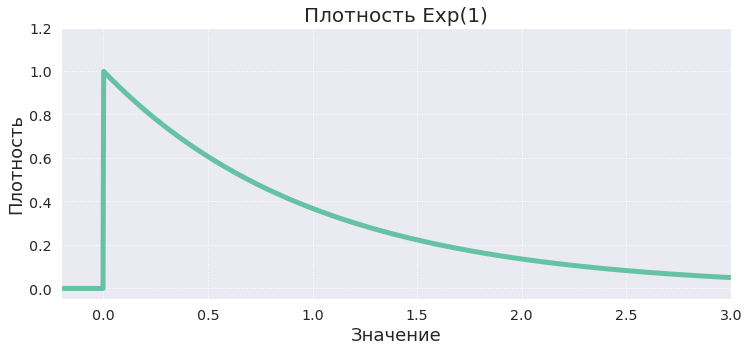

In [3]:
show_pdf(pdf=sps.expon.pdf, xmin=-0.2, xmax=3, ymax=1.2, 
         grid_size=1000, distr_name=r'Exp(1)', 
         scale=1)

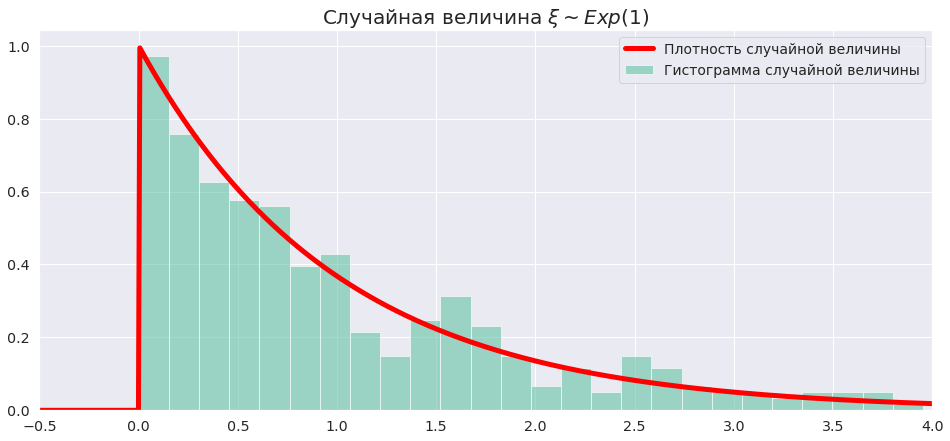

In [4]:
grid = np.linspace(-3, 4, 1000)
plt.figure(figsize=(16, 7))
sample = sps.expon.rvs(size=400)
plt.hist(sample,  bins=40, density=True, alpha=0.6, 
         label='Гистограмма случайной величины') 
plt.plot(grid, sps.expon.pdf(grid), color='red', lw=5, 
         label='Плотность случайной величины') 
plt.title(r'Случайная величина $\xi \sim Exp(1)$', fontsize=20)
plt.xlim(-0.5, 4)
plt.legend(fontsize=14, loc=1)
plt.show()

In [5]:
# создать виджет, но не отображать его
ip = widgets.interactive(
    show_pdf,
    pdf=widgets.fixed(sps.expon.pdf),
    grid_size=widgets.IntSlider(min=25, max=300, step=25, value=100),
    xmin=widgets.FloatSlider(min=-10, max=0, step=0.1, value=-0.2),
    xmax=widgets.FloatSlider(min=0, max=10, step=0.1, value=5),
    ymax=widgets.FloatSlider(min=0, max=2, step=0.1, value=1.4),
    scale=widgets.FloatSlider(min=0.01, max=4, step=0.01, value=1),
    distr_name=r'$Exp(1/\lambda$ = {scale})'
);

# отображаем слайдеры группами
display(widgets.HBox(ip.children[:2]))
display(widgets.HBox(ip.children[2:4]))
display(widgets.HBox(ip.children[5:6]))
# отображаем вывод функции
display(ip.children[-1])

ip.update()  # чтобы функция запустилась до первого изменения слайдеров

Output()

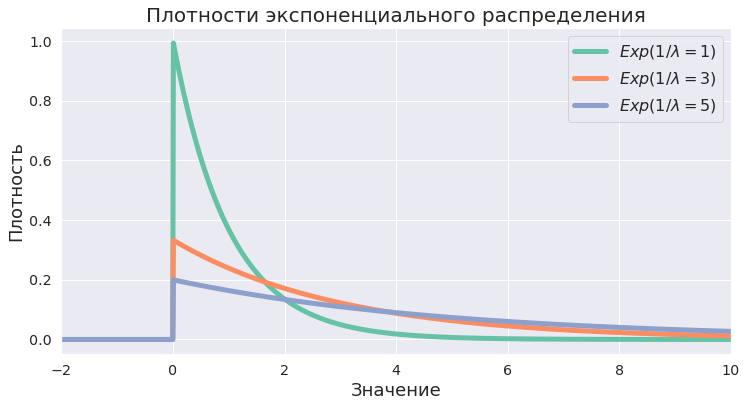

In [6]:
grid = np.linspace(-2, 10, 1000)  # сетка для построения графика
scale_values = [1, 3, 5]  # набор значений параметра scale

plt.figure(figsize=(12, 6))

for i, scale in enumerate(scale_values):
    plt.plot(grid, sps.expon(scale=scale).pdf(grid), lw=5,
    label='$Exp(1/\lambda = {scale})$'.format(scale=scale))
    plt.legend(fontsize=16)

plt.title('Плотности экспоненциального распределения', fontsize=20)
plt.xlabel('Значение', fontsize=18)
plt.ylabel('Плотность', fontsize=18)
plt.xlim(-2, 10)
plt.show()

Будем рассуждать об экспоненциальном распределении в следующих терминах: представим, что мы продавец в магазине. Время между появлениями двух последовательных покупателей примем за случайную величину с экспоненциальным распределением.
Данный жизненный пример соответствует именно экспоненциальному распределению, потому что количество времени, уже затраченное нами на ожидание покупателя, не влияет на время, которое нам ещё придётся прождать его. Формально: $P(X \gt t_1 + t_2\:|\:X \geq t_1) = P(X \gt t_2)$, где $t_1$ --- сколько мы прождали покупателя, $t_2$ --- сколько нам еще предстоит его ждать. Относительно несложно показать, что данному условию удовлетворяет только экспоненциальное распределение среди абсолютно непрерывных распределений. Это свойство называется законом отсутствия памяти.

**Важно:** в `scipy.stats` у экспоненицального распределения параметр `scale` равен $1/\lambda$.  
  
Для экспоненциального распределения $Exp(\lambda)$:
* параметр $\lambda$ --- определяет выпуклость кривой и начальное значение плотности вероятности в правой окрестности нуля.  Чем больше $\lambda$, тем больше площади под кривой в правой окрестности нуля. Значит, чем больше $\lambda$, тем вероятнее, что время между приходом покупателей будет мало и, как следствие, они будут чаще приходить (интенсивнее). Делаем вывод, что $\lambda$  --- это среднее число новых покупателей за единицу времени, иными словами --- частота прихода покупателей. Отметим, что $1/\lambda$ --- среднее время между приходом двух последовательных покупателей. По определению, это математическое ожидание, то есть $1/\lambda$ --- среднее время ожидания нового покупателя.

## Гамма-распределение

$\Gamma(\alpha, \beta)$ --- гамма распределение. 
  
Параметры в `scipy.stats`: 
* `a` = $\beta$
* `scale` = 1/$\alpha$

Свойства распределения: 
* математическое ожидание: $\frac{\beta}{\alpha}$
* дисперсия: $\frac{\beta}{\alpha^2}$

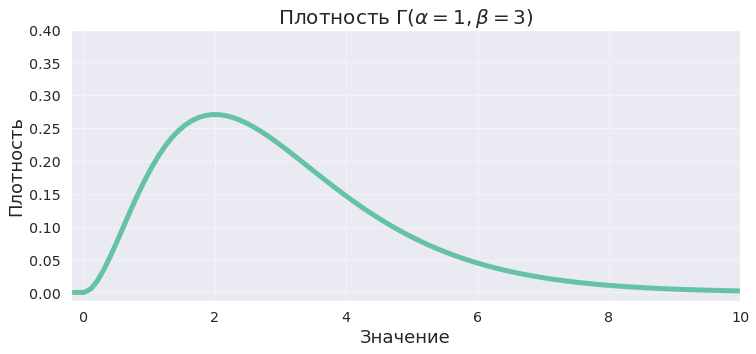

In [7]:
show_pdf(pdf=sps.gamma.pdf, xmin=-0.2, xmax=10, ymax=0.4, 
         grid_size=100, distr_name=r'$\Gamma(\alpha = 1, \beta = 3)$', 
         a=3, scale=1)

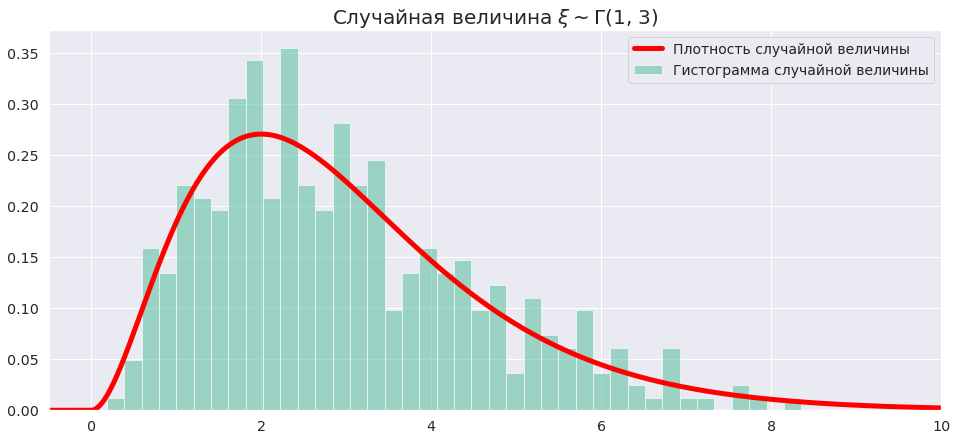

In [8]:
grid = np.linspace(-3, 10, 1000)
plt.figure(figsize=(16, 7))
sample = sps.gamma(a=3, scale=1).rvs(size=400)
plt.hist(sample, bins=40, density=True, alpha=0.6, 
         label='Гистограмма случайной величины') 
plt.plot(grid, sps.gamma(a=3, scale=1).pdf(grid), color='red', lw=5, 
         label='Плотность случайной величины') 
plt.title(r'Случайная величина $\xi \sim \Gamma$(1, 3)', fontsize=20)
plt.xlim(-0.5, 10)
plt.legend(fontsize=14, loc=1)
plt.show()

In [9]:
# создать виджет, но не отображать его
ip = widgets.interactive(
    show_pdf,
    pdf=widgets.fixed(sps.gamma.pdf),
    grid_size=widgets.IntSlider(min=25, max=300, step=25, value=100),
    xmin=widgets.FloatSlider(min=-10, max=0, step=0.1, value=-5),
    xmax=widgets.FloatSlider(min=0, max=100, step=0.1, value=5),
    ymax=widgets.FloatSlider(min=0, max=2, step=0.1, value=1.4),
    a = widgets.FloatSlider(min=0, max=10, step=0.1, value=1),
    scale=widgets.FloatSlider(min=0.01, max=4, step=0.01, value=1),
    distr_name=r'$\Gamma$($\alpha$ = 1/scale = 1/{scale}, $\beta$ = a = {a})'
);

# отображаем слайдеры группами
display(widgets.HBox(ip.children[:2]))
display(widgets.HBox(ip.children[2:4]))
display(widgets.HBox(ip.children[5:7]))
# отображаем вывод функции
display(ip.children[-1])

ip.update()  # чтобы функция запустилась до первого изменения слайдеров

Output()

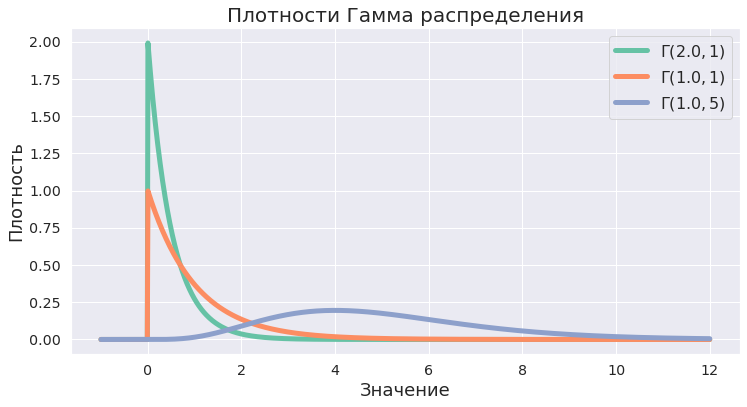

In [10]:
grid = np.linspace(-1, 12, 1000)  # сетка для построения графика
a_values = [1, 1, 5]
scale_values = [0.5, 1, 1] 

plt.figure(figsize=(12, 6))

for i, (a, scale) in enumerate(zip(a_values, scale_values)):
    plt.plot(
        grid, sps.gamma(a, 0, scale).pdf(grid), lw=5, 
        label='$\Gamma' + '({alpha}, {beta})$'.format(alpha=1/scale, beta=a)
    )

plt.legend(fontsize=16)
plt.title('Плотности Гамма распределения', fontsize=20)
plt.xlabel('Значение', fontsize=18)
plt.ylabel('Плотность', fontsize=18)
plt.show()

Проверим полезное свойство Гамма-распределения.  
Пусть $\xi_1, \xi_2 ... \xi_n$ ~ $Exp(\lambda)$ и независимы. Тогда $\sum_{k=1}^{n}\xi_k$ ~ $\Gamma(\lambda, n)$

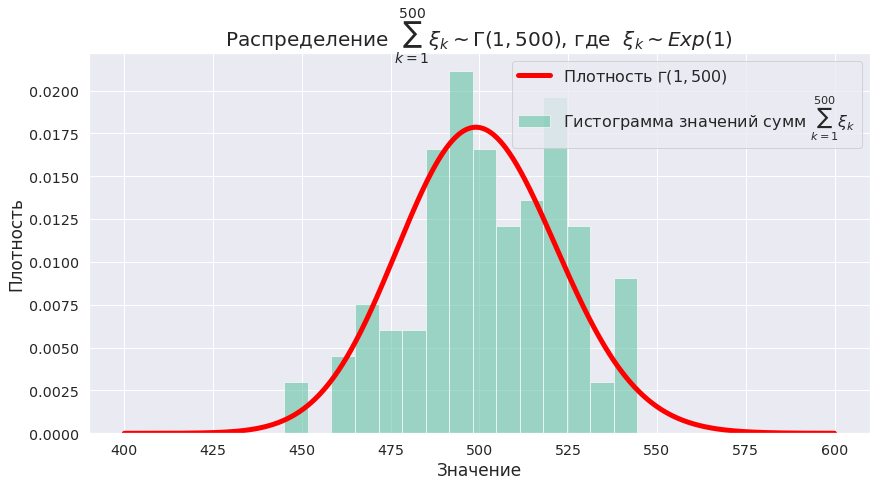

In [11]:
# количество сумм (каждая сумма соответствует реализации 
# случайной величины из гамма-распределения) 
N = 100  
n = 500  # количество экспоненциальных случайных величин в одной сумме

lambd = 1
expon_samples = sps.expon(scale = 1/lambd).rvs((N, n))

gamma_sample = expon_samples.sum(axis=1)

plt.figure(figsize=(14,7))
plt.hist(gamma_sample, density=True, bins=15, alpha=0.6, 
         label=r'Гистограмма значений сумм $\sum_{k=1}^{500}\xi_k$')
grid = np.linspace(400, 600, 1000)
plt.plot(grid, sps.gamma(a=n, scale=1/lambd).pdf(grid), lw=5, color='red', 
         label=r'Плотность $\mathcal{\Gamma}(1, 500)$')
plt.title(
    r'Распределение $\sum_{k=1}^{500}\xi_k \sim \Gamma(1, 500)$, где  $\xi_k \sim Exp(1)$', 
    fontsize=20
)
plt.xlabel('Значение', fontsize=17)
plt.ylabel('Плотность', fontsize=17)
plt.legend(fontsize=16)
plt.show()

## Бета-распределение

$Beta(\alpha, \beta)$ - гамма распределение. 
  
Параметры в scipy.stats: 
* `a` = $\alpha$
* `b` = $\beta$

Свойства распределения: 
* математическое ожидание: $\frac{\alpha}{\alpha + \beta}$
* дисперсия: $\frac{\alpha \cdot \beta}{(\alpha + \beta)^2 \cdot (\alpha + \beta + 1)}$

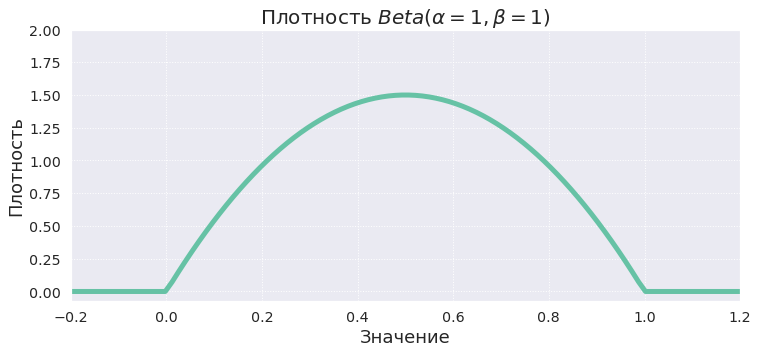

In [12]:
show_pdf(pdf=sps.beta.pdf, xmin=-0.2, xmax=1.2, ymax=2, grid_size=100, 
         distr_name=r'$Beta(\alpha = 1, \beta = 1)$', 
         a=2, b=2)

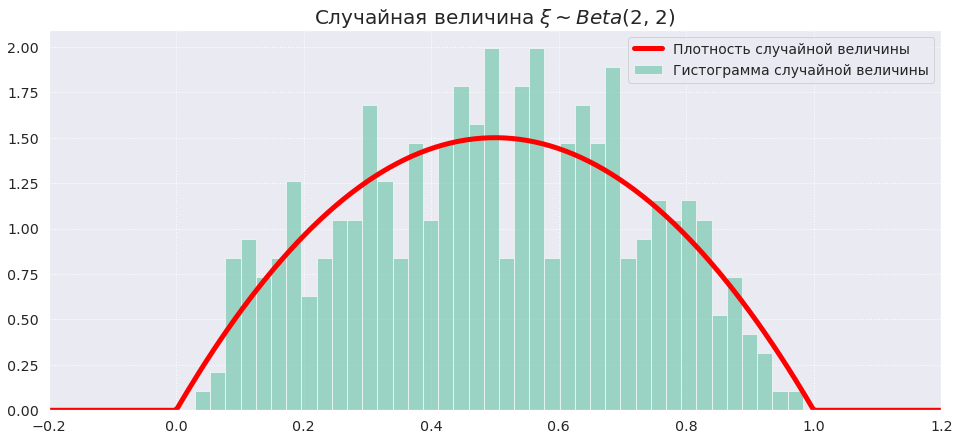

In [13]:
grid = np.linspace(-2, 2, 1000)
sample = sps.beta(a=2, b=2).rvs(size=400)

plt.figure(figsize=(16, 7))
plt.hist(sample, bins=40, density=True, alpha=0.6, 
         label='Гистограмма случайной величины') 
plt.plot(grid, sps.beta(a=2, b=2).pdf(grid), color='red', lw=5, 
         label='Плотность случайной величины') 
plt.title(r'Случайная величина $\xi \sim Beta$(2, 2)', fontsize=20)
plt.grid(ls=':')
plt.xlim(-0.2, 1.2)
plt.legend(fontsize=14, loc=1)
plt.show()

In [14]:
# создать виджет, но не отображать его
ip = widgets.interactive(
    show_pdf,
    pdf=widgets.fixed(sps.beta.pdf),
    grid_size=widgets.IntSlider(min=25, max=300, step=25, value=100),
    xmin=widgets.FloatSlider(min=-1, max=0, step=0.1, value=-5),
    xmax=widgets.FloatSlider(min=1, max=2, step=0.1, value=5),
    ymax=widgets.FloatSlider(min=0, max=10, step=0.1, value=1.4),
    a=widgets.FloatSlider(min=0, max=10, step=0.1, value=1),
    b=widgets.FloatSlider(min=0.01, max=4, step=0.01, value=1),
    distr_name=r'$Beta$($\alpha$ = {a}, $\beta$ = {b})'
);

# отображаем слайдеры группами
display(widgets.HBox(ip.children[:2]))
display(widgets.HBox(ip.children[2:4]))
display(widgets.HBox(ip.children[5:7]))
# отображаем вывод функции
display(ip.children[-1])

ip.update()  # чтобы функция запустилась до первого изменения слайдеров

Output()

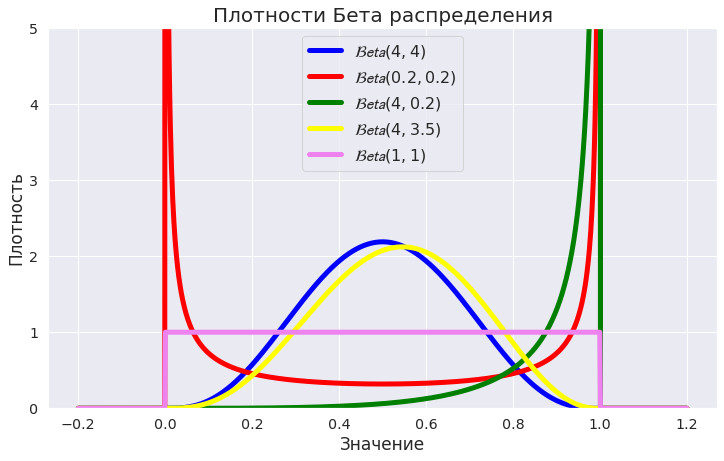

In [15]:
grid = np.linspace(-0.2, 1.2, 1000)  # сетка для построения графика
a_values = [4, 0.2, 4, 4, 1]
b_values = [4, 0.2, 0.2, 3.5,1]

plt.figure(figsize=(12, 7))

for i, (a, b, color) in enumerate(
    zip(a_values, b_values, ['b', 'r', 'g', 'yellow', 'violet'])
):
    plt.plot(grid, sps.beta(a, b).pdf(grid), color=color, lw=5, 
             label='$\mathcal{Beta}' + '({}, {})$'.format(a, b))
    
plt.legend(fontsize=16)
plt.ylim(0, 5)
plt.title('Плотности Бета распределения', fontsize=20)
plt.ylabel('Плотность', fontsize=17)
plt.xlabel('Значение', fontsize=17)
plt.show()

**Вывод:** о бета-распределении легко рассуждать в терминах монетки. Носителем Бета-распределения является отрезок $[0, 1]$. Мы будем интерпретировать данное распределение как знание о "честности монетки". Примем обозначения, 0 --- решка, 1 --- орел. Выше мы рассмотрели поведение графика плотности Бета-распределения в зависимости от параметров $\alpha$ и $\beta$. Рассмотрим, как форма графика соотносится с "честностью монетки":
* СИНИЙ ЦВЕТ: монета скорее честная (при таком распределении наиболее вероятны значения  p  в окрестности 0.5) - в этом случае $\alpha$ и $\beta$ равны, причем чем больше их значение, тем более вероятна честность монеты.
* КРАСНЫЙ ЦВЕТ: монета скорее нечестная, перевес неизвестен (наименее вероятны значения  p  в окрестности 0.5) - в этом случае один из параметров меньше 1, причем чем он меньше, тем сильнее вытягивает на себя вероятность. Необязательно, что только один из параметров меньше 1 - оба параметра могут быть меньше 1. В этом случае монетка будет нечестной, но нельзя сказать в какую сторону. 
* ЗЕЛЕНЫЙ ЦВЕТ: монета скорее нечестная, перевес в сторону герба (наиболее вероятны значения  p  в окрестности 1) - в этом случае параметр $\beta$ меньше единицы, причем чем он меньше, тем больше веротяность значений в окрестности 1. 
* ЖЕЛТЫЙ ЦВЕТ: монета скорее честная, либо с небольшим перекосом вправо (наиболее вероятны значения  p  в окрестности ~0.6) - в этом случае параметры больше 1, причем $\beta$ немного меньше, чем $\alpha$.
* РОЗОВЫЙ ЦВЕТ: ничего не известно (все значения равновероятны) - в таком случае $\alpha=1$ и $\beta=1$ - получаем равномерное распределение на отрезке [0;1]

# Независимость

#### 1. Нескоррелированные, но зависимые случайные величины

Зададим случайные величины $X \sim U(-1, 1)$ и $Y = X^2$. Очевидно, они зависимы.

In [16]:
# генерируем выборку

X = sps.uniform(loc=-1, scale=2).rvs(size=1000) 
Y = X**2

Эти величины не скореллированы. Действительно:

$$ cov(X, Y) = \mathsf{E}X \mathsf{E}Y - \mathsf{E}XY$$

$$ \mathsf{E}X\mathsf{E}Y = 0 \cdot \mathsf{E}Y  = 0 $$

$$ \mathsf{E}XY = \mathsf{E}X^3 = \int\limits_{-1}^{1}x^3 \cdot 0.5 \ \ dx = 0$$


Построим scatter plot для этих величин.



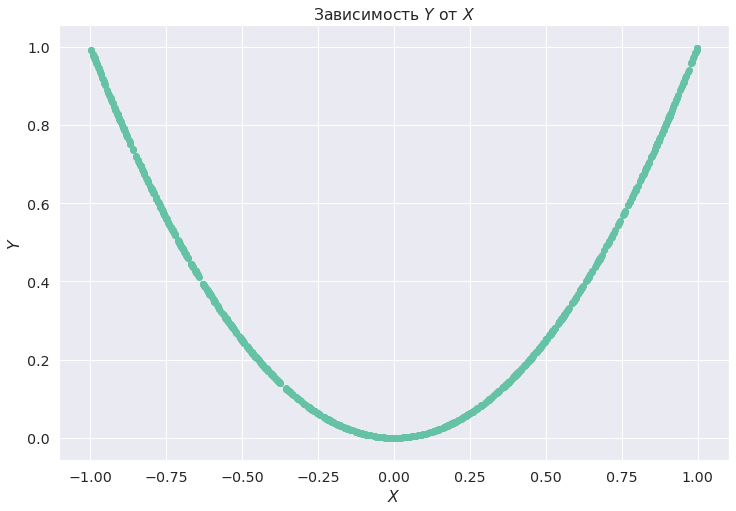

In [17]:
plt.figure(figsize=(12, 8))
plt.scatter(X, Y)
plt.xlabel('$X$')
plt.ylabel('$Y$')
plt.title('Зависимость $Y$ от $X$')
plt.show()

Посчитаем ковариацию по сгенерированным значениям:

In [18]:
np.round(np.mean(X * Y) - np.mean(X) * np.mean(Y), 2) 

-0.01

Видим, что ковариация почти равна нулю.

#### 2. Биномиальное распределение

Сгенерируем случайные величины $X \sim Bern(0.5)$ и $Y = 1 - X + noise$

In [19]:
# Генерируем X. Хотим насэмплить 1000 сумм 200 бернуллиевских величин
X = sps.bernoulli(p=0.5).rvs(size=(100, 1000))

# Y = зашумленный 1 - X
Y = np.abs(1 - X -  sps.bernoulli(p=0.04).rvs(size=(100, 1000)))

Сравним гистограмму для значений сумм зависимых бернулиевских случайных величин и для значений случайной величины из биномиального распределения $Binom(200, 0.5)$

In [20]:
# стакаем X и Y и считаем суммы по столбцам
to_plot = np.sum(np.vstack((X, Y)), axis=0)

Сгенерируем независимые бернуллиевские величины, и посчитаем их сумму

In [21]:
# сэмплим 1000 сумм 200 независимых бернуллиевских величин
bernoulli_sample = sps.bernoulli(p=0.5).rvs(size=(200, 1000))
sample = bernoulli_sample.sum(axis=0)

Рисуем графики

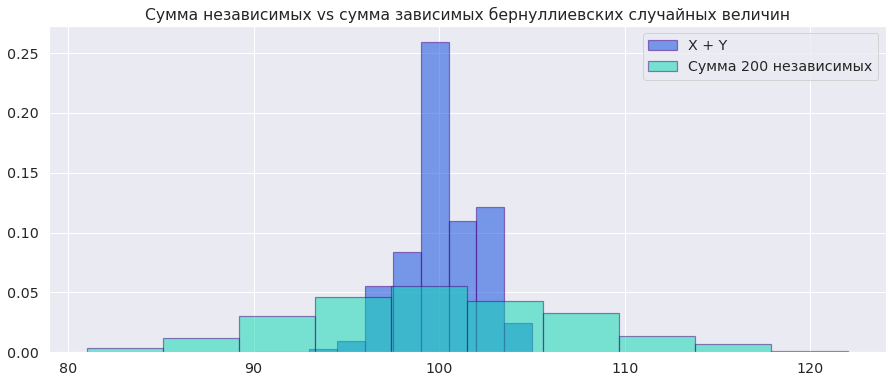

In [22]:
plt.figure(figsize=(15, 6))

# график для суммы 200 не независимых бернуллиевских с.в.
plt.hist(
    to_plot, bins=10, alpha=0.5, color='xkcd:blue',density=True, 
    edgecolor='indigo', linewidth=1.2, label='X + Y'
)

# график для суммы 200 независимых бернуллиевских величин
plt.hist(
    sample, bins=10, alpha=0.5, color='xkcd:aquamarine', density=True,
    edgecolor='indigo', linewidth=1.2, label='Сумма 200 независимых'
)
plt.title('Сумма независимых vs сумма зависимых бернуллиевских случайных величин')
plt.legend()
plt.show()

Видно, что распределения не совпадают. 

### Граф зависимости

Рассморим граф зависимостей из презентации:



In [23]:
import networkx as nx


nodes = ['a', 'b', 'c', 'd']  # вершины орграфа из презентации
edges = [('a', 'c'), ('b', 'c'), ('c', 'd')] # ребра

# отрисовываем позиции
pos = {'a': (19, 40), 'b': (21, 40), 'c': (20, 10), 'd': (20, -20)} 

# создаем орграф зависимостей
g = nx.DiGraph()  
g.add_nodes_from(nodes)
g.add_edges_from(edges)

Здесь
* a — количество студентов на ФПМИ.Индустрия
* b — количество студентов на ФПМИ.Наука
* c — количество студентов, пришедших на лекцию
* d — количество отмеченных студентов

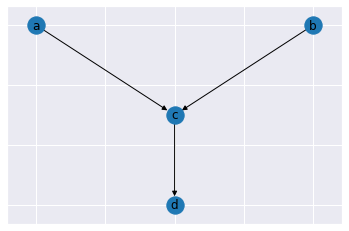

In [24]:
# рисуем оргаф зависимостей
nx.draw_networkx(g, pos=pos, with_label = True)  



Пусть также:
* $p_1 = 0.8$ — вероятность, что студент ФПМИ.Индустрия посетит лекцию,
* $p_2 = 0.7$ — вероятность, что студент ФПМИ.Наука посетит лекцию,
* $p_3 = 0.2$ — вероятность, что студент отметит друга
* $a \sim U(20, 100)$
* $b \sim U(10, 120)$


Тогда: 

* $c\:|\:a, b \ \ \sim \ \ Bin(a, p_1) + Bin(b, p_2)$
* $d\:|\:c \ \ \sim \ \ c + Bin(c, p_3)$

Для того, чтобы оценить распределение $d|c$ и $c|a,b$ воспользуемся семплированием

In [25]:
# сэмплим количества студентов ФИВТ-а и ФУПМ-а
a_sample = sps.randint(low=20, high=100).rvs(1000)  # ФИВТ
b_sample = sps.randint(low=10, high=120).rvs(1000)  # ФУПМ

Напоминание: в параметры распределений можно пробрасывать массивы

In [26]:
# количество пришедших студентов в зависимотсти от общего количества на факультетах
c_on_a_b = sps.binom(n=a_sample, p=0.8).rvs(size=1000) \
           + sps.binom(n=b_sample, p=0.7).rvs(size=1000)

In [27]:
# сэмплим число отмеченных студентов в зависимости от пришедших
d_on_c = c_on_a_b + sps.binom(n=c_on_a_b, p=0.2).rvs(1000)

Рисуем графики распределений

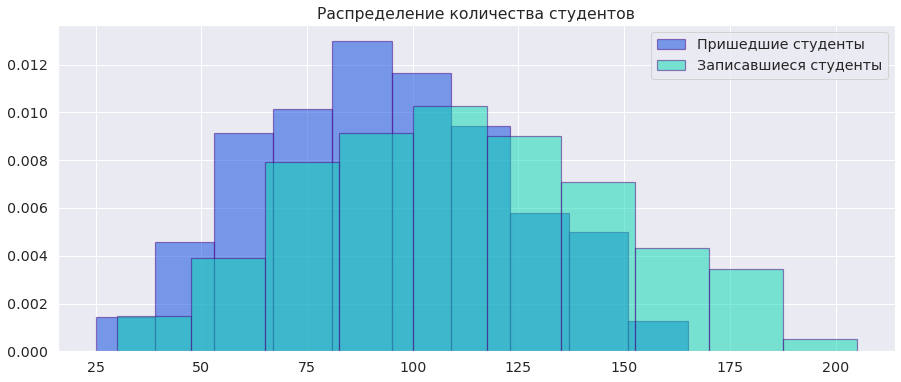

In [28]:
plt.figure(figsize=(15, 6))

# график для числа пришедших студентов
plt.hist(
    c_on_a_b, bins=10, alpha=0.5, color='xkcd:blue',density=True, 
    edgecolor='indigo', linewidth=1.2, label='Пришедшие студенты'
)

# график для числа отмеченных студентов
plt.hist(
    d_on_c, bins=10,alpha=0.5, color='xkcd:aquamarine', density=True, 
    edgecolor='indigo',linewidth=1.2, label='Записавшиеся студенты'
)

plt.title('Распределение количества студентов')
plt.legend()
plt.show()

-----

Введение в анализ данных, 2020

<a href="https://mipt-stats.gitlab.io">mipt-stats.gitlab.io</a>